### Import necessory libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn import metrics
import glob

### Import the model

In [19]:
from keras_cv_attention_models import coatnet
model= coatnet.CoAtNet0()

>>>> Load pretrained from: C:\Users\user\.keras\models\coatnet0_224_imagenet.h5


### Read the files

In [3]:
train_pandas=glob.glob('Train/Pandas/*jpeg')
train_bear=glob.glob('Train/Bears//*jpeg')

In [4]:
test_pandas=glob.glob('Test/Pandas/*jpeg')
test_bear=glob.glob('Test/Bears//*jpeg')

In [5]:
data={0:'Bear',1:'Pandas'}

### Store all the images inside a list and create a list with the corresponding labels

In [6]:
train_image=[]
train_label=[]
for i in train_bear:
    img=plt.imread(i)
    train_image.append(img)
    train_label.append(0)
    
for i in train_pandas:
    img=plt.imread(i)
    train_image.append(img)
    train_label.append(1)

In [7]:
test_image=[]
test_label=[]
for i in train_bear:
    img=plt.imread(i)
    test_image.append(img)
    test_label.append(0)
    
for i in test_pandas:
    img=plt.imread(i)
    test_image.append(img)
    test_label.append(1)

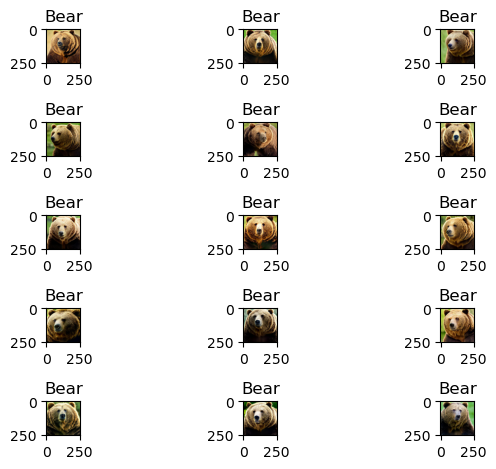

In [8]:
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.imshow(train_image[i])
    plt.title(data[train_label[i]])
plt.tight_layout()

### Shuffle and resize the images

In [9]:
train_images , train_labels = shuffle(train_image,train_label)

In [10]:
test_images , test_labels = shuffle(test_image,test_label)

In [ ]:
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.imshow(train_image[i])
    plt.title(data[train_label[i]])
plt.tight_layout()

In [11]:
X_train=[]
for i in train_images:
    X_train.append(resize(i,(224,224,3)))

In [12]:
X_test=[]
for i in test_images:
    X_test.append(resize(i,(224,224,3)))

In [13]:
y_train=np.array(train_labels)
y_test=np.array(test_labels)
X_train=np.array(X_train)
X_test=np.array(X_test)

In [14]:
print(f'Shape of x_train is: {X_train.shape}')
print(f'Shape of x_test is: {X_test.shape}')
print(f'Shape of y_train is: {y_train.shape}')
print(f'Shape of y_train is: {y_test.shape}')

Shape of x_train is: (500, 224, 224, 3)
Shape of x_test is: (300, 224, 224, 3)
Shape of y_train is: (500,)
Shape of y_train is: (300,)


### Compile the model

In [55]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [56]:
model.summary()

Model: "coatnet0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_1_pad (ZeroPadding2D)  (None, 226, 226, 3)          0         ['input_3[0][0]']             
                                                                                                  
 stem_1_conv (Conv2D)        (None, 112, 112, 64)         1728      ['stem_1_pad[0][0]']          
                                                                                                  
 stem_1_bn (BatchNormalizat  (None, 112, 112, 64)         256       ['stem_1_conv[0][0]']         
 ion)                                                                                      

 (BatchNormalization)                                               0][0]']                       
                                                                                                  
 stack_1_block_2_expand_gel  (None, 56, 56, 384)          0         ['stack_1_block_2_expand_bn[0]
 u (Activation)                                                     [0]']                         
                                                                                                  
 stack_1_block_2_MB_pad (Ze  (None, 58, 58, 384)          0         ['stack_1_block_2_expand_gelu[
 roPadding2D)                                                       0][0]']                       
                                                                                                  
 stack_1_block_2_MB_dw_conv  (None, 56, 56, 384)          3456      ['stack_1_block_2_MB_pad[0][0]
  (DepthwiseConv2D)                                                 ']                            
          

                                                                                                  
 stack_2_block_1_shortcut_p  (None, 28, 28, 96)           0         ['stack_1_block_2_output[0][0]
 ool (MaxPooling2D)                                                 ']                            
                                                                                                  
 stack_2_block_1_se_out (Mu  (None, 28, 28, 384)          0         ['stack_2_block_1_MB_dw_gelu[0
 ltiply)                                                            ][0]',                        
                                                                     'stack_2_block_1_se_sigmoid[0
                                                                    ][0]']                        
                                                                                                  
 stack_2_block_1_shortcut_c  (None, 28, 28, 192)          18432     ['stack_2_block_1_shortcut_poo
 onv (Conv

                                                                                                  
 stack_2_block_3_MB_pad (Ze  (None, 30, 30, 768)          0         ['stack_2_block_3_expand_gelu[
 roPadding2D)                                                       0][0]']                       
                                                                                                  
 stack_2_block_3_MB_dw_conv  (None, 28, 28, 768)          6912      ['stack_2_block_3_MB_pad[0][0]
  (DepthwiseConv2D)                                                 ']                            
                                                                                                  
 stack_2_block_3_MB_dw_bn (  (None, 28, 28, 768)          3072      ['stack_2_block_3_MB_dw_conv[0
 BatchNormalization)                                                ][0]']                        
                                                                                                  
 stack_2_b

                                                                                                  
 tf.linalg.matmul_29 (TFOpL  (None, 6, 196, 32)           0         ['stack_3_block_1_mhsa_attenti
 ambda)                                                             on_scores[0][0]',             
                                                                     'tf.compat.v1.transpose_58[0]
                                                                    [0]']                         
                                                                                                  
 tf.compat.v1.transpose_59   (None, 196, 6, 32)           0         ['tf.linalg.matmul_29[0][0]'] 
 (TFOpLambda)                                                                                     
                                                                                                  
 stack_3_block_1_shortcut_p  (None, 14, 14, 192)          0         ['stack_2_block_3_output[0][0]
 ool (MaxP

 tf.linalg.matmul_31 (TFOpL  (None, 12, 196, 32)          0         ['stack_3_block_2_mhsa_attenti
 ambda)                                                             on_scores[0][0]',             
                                                                     'tf.compat.v1.transpose_62[0]
                                                                    [0]']                         
                                                                                                  
 tf.compat.v1.transpose_63   (None, 196, 12, 32)          0         ['tf.linalg.matmul_31[0][0]'] 
 (TFOpLambda)                                                                                     
                                                                                                  
 tf.reshape_15 (TFOpLambda)  (None, 14, 14, 384)          0         ['tf.compat.v1.transpose_63[0]
                                                                    [0]']                         
          

                                                                                                  
 tf.reshape_16 (TFOpLambda)  (None, 14, 14, 384)          0         ['tf.compat.v1.transpose_67[0]
                                                                    [0]']                         
                                                                                                  
 stack_3_block_3_mhsa_outpu  (None, 14, 14, 384)          147456    ['tf.reshape_16[0][0]']       
 t (Dense)                                                                                        
                                                                                                  
 stack_3_block_3_output (Ad  (None, 14, 14, 384)          0         ['stack_3_block_2_ffn_output[0
 d)                                                                 ][0]',                        
                                                                     'stack_3_block_3_mhsa_output[
          

 stack_3_block_4_output (Ad  (None, 14, 14, 384)          0         ['stack_3_block_3_ffn_output[0
 d)                                                                 ][0]',                        
                                                                     'stack_3_block_4_mhsa_output[
                                                                    0][0]']                       
                                                                                                  
 stack_3_block_4_ffn_preact  (None, 14, 14, 384)          768       ['stack_3_block_4_output[0][0]
 _ln (LayerNormalization)                                           ']                            
                                                                                                  
 stack_3_block_4_ffn_1_conv  (None, 14, 14, 1536)         589824    ['stack_3_block_4_ffn_preact_l
  (Conv2D)                                                          n[0][0]']                     
          

                                                                                                  
 stack_3_block_5_ffn_1_conv  (None, 14, 14, 1536)         589824    ['stack_3_block_5_ffn_preact_l
  (Conv2D)                                                          n[0][0]']                     
                                                                                                  
 stack_3_block_5_ffn_gelu (  (None, 14, 14, 1536)         0         ['stack_3_block_5_ffn_1_conv[0
 Activation)                                                        ][0]']                        
                                                                                                  
 stack_3_block_5_ffn_2_conv  (None, 14, 14, 384)          589824    ['stack_3_block_5_ffn_gelu[0][
  (Conv2D)                                                          0]']                          
                                                                                                  
 stack_3_b

 stack_4_block_1_ffn_preact  (None, 7, 7, 768)            1536      ['stack_4_block_1_output[0][0]
 _ln (LayerNormalization)                                           ']                            
                                                                                                  
 stack_4_block_1_ffn_1_conv  (None, 7, 7, 3072)           2359296   ['stack_4_block_1_ffn_preact_l
  (Conv2D)                                                          n[0][0]']                     
                                                                                                  
 stack_4_block_1_ffn_gelu (  (None, 7, 7, 3072)           0         ['stack_4_block_1_ffn_1_conv[0
 Activation)                                                        ][0]']                        
                                                                                                  
 stack_4_block_1_ffn_2_conv  (None, 7, 7, 768)            2359296   ['stack_4_block_1_ffn_gelu[0][
  (Conv2D)

 Activation)                                                        ][0]']                        
                                                                                                  
 stack_4_block_2_ffn_2_conv  (None, 7, 7, 768)            2359296   ['stack_4_block_2_ffn_gelu[0][
  (Conv2D)                                                          0]']                          
                                                                                                  
 stack_4_block_2_ffn_output  (None, 7, 7, 768)            0         ['stack_4_block_2_output[0][0]
  (Add)                                                             ',                            
                                                                     'stack_4_block_2_ffn_2_conv[0
                                                                    ][0]']                        
                                                                                                  
 avg_pool 

### Fit the model

In [25]:
model.fit(X_train,y_train,epochs=2,validation_split=0.05,batch_size=10)

Epoch 1/2
48/48 [==============================] - 699s 14s/step - loss: 4.2070 - accuracy: 0.8737 - val_loss: 6.5487 - val_accuracy: 0.8800
Epoch 2/2
48/48 [==============================] - 844s 18s/step - loss: 19.4734 - accuracy: 0.8632 - val_loss: 2.3203 - val_accuracy: 0.9200


In [26]:
model.evaluate(X_train,y_train)

16/16 [==============================] - 105s 6s/step - loss: 2.9604 - accuracy: 0.8640


[2.9603965282440186, 0.8640000224113464]

In [27]:
prediction=model.predict(X_test)

10/10 [==============================] - 72s 7s/step


In [28]:
y_pred=[np.argmax(i) for i in prediction]

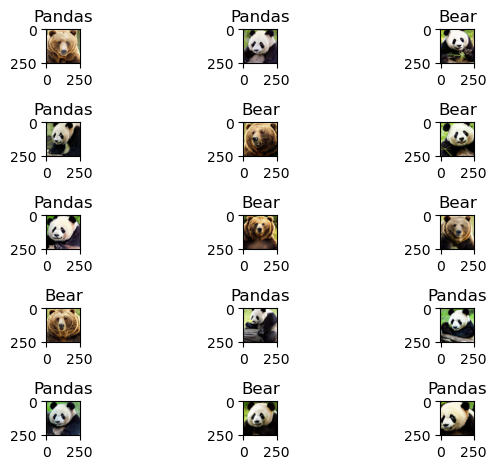

In [30]:
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.imshow(train_images[i])
    plt.title(data[y_pred[i]])
plt.tight_layout()

### Plot the metrics

In [33]:
print(f'metrics score is: {metrics.accuracy_score(y_test, y_pred)}')
print()
print('classification report:')
print(metrics.classification_report(y_test,y_pred))

metrics score is: 0.7733333333333333

classification report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84       250
           1       0.42      1.00      0.60        50

    accuracy                           0.77       300
   macro avg       0.71      0.86      0.72       300
weighted avg       0.90      0.77      0.80       300



<Axes: >

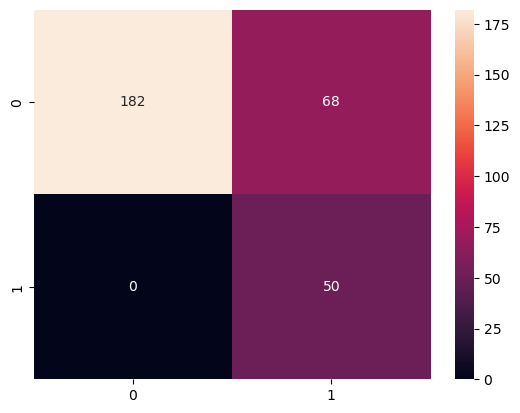

In [34]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, fmt='d')

### Email:shamilmskeeri@gmail.com